In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

sns.set_style('darkgrid')

# Load the data

base_path = "Predictions/CrossVal/"

path = base_path + "M/lungs.csv"
lungs_m = pd.read_csv(path)
path = base_path + "M/heart.csv"
heart_m = pd.read_csv(path)

aux_heart = heart_m.drop(columns = ['Dice Heart'])
lungs_m = pd.concat([lungs_m, aux_heart], axis = 0)

path = base_path + "M/rca_lungs.csv"
rca_lungs_m = pd.read_csv(path)
path = base_path + "M/rca_heart.csv"
rca_heart_m = pd.read_csv(path)

aux_heart = rca_heart_m.drop(columns = ['Dice Heart'])
rca_lungs_m = pd.concat([rca_lungs_m, aux_heart], axis = 0)

path = base_path + "M/rca_lungs_max.csv"
rca_lungs_max_m = pd.read_csv(path)
path = base_path + "M/rca_heart_max.csv"
rca_heart_max_m = pd.read_csv(path)

aux_heart = rca_heart_max_m.drop(columns = ['Dice Heart'])
rca_lungs_max_m = pd.concat([rca_lungs_max_m, aux_heart], axis = 0)

# Now F 

path = base_path + "F/lungs.csv"
lungs_f = pd.read_csv(path)
path = base_path + "F/heart.csv"
heart_f = pd.read_csv(path)

aux_heart = heart_f.drop(columns = ['Dice Heart'])
lungs_f = pd.concat([lungs_f, aux_heart], axis = 0)

path = base_path + "F/rca_lungs.csv"
rca_lungs_f = pd.read_csv(path)
path = base_path + "F/rca_heart.csv"
rca_heart_f = pd.read_csv(path)

aux_heart = rca_heart_f.drop(columns = ['Dice Heart'])
rca_lungs_f = pd.concat([rca_lungs_f, aux_heart], axis = 0)

path = base_path + "F/rca_lungs_max.csv"
rca_lungs_max_f = pd.read_csv(path)
path = base_path + "F/rca_heart_max.csv"
rca_heart_max_f = pd.read_csv(path)

aux_heart = rca_heart_max_f.drop(columns = ['Dice Heart'])
rca_lungs_max_f = pd.concat([rca_lungs_max_f, aux_heart], axis = 0)

In [2]:
# Draw a boxplot for each metric

data_1 = lungs_m.copy()
data_1["Trained In"] = data_1["Model"].str.split("_").str[0]
data_1["Tested In"] = "Males"

data_2 = lungs_f.copy()
data_2["Trained In"] = data_2["Model"].str.split("_").str[0]
data_2["Tested In"] = "Females"

data_3 = rca_lungs_m.copy()
data_3["Trained In"] = data_3["Model"].str.split("_").str[0]
data_3["Tested In"] = "Males"

data_4 = rca_lungs_f.copy()
data_4["Trained In"] = data_4["Model"].str.split("_").str[0]
data_4["Tested In"] = "Females"

data_5 = heart_m.copy()
data_5["Trained In"] = data_5["Model"].str.split("_").str[0]
data_5["Tested In"] = "Males"

data_6 = heart_f.copy()
data_6["Trained In"] = data_6["Model"].str.split("_").str[0]
data_6["Tested In"] = "Females"

data_7 = rca_heart_m.copy()
data_7["Trained In"] = data_7["Model"].str.split("_").str[0]
data_7["Tested In"] = "Males"

data_8 = rca_heart_f.copy()
data_8["Trained In"] = data_8["Model"].str.split("_").str[0]
data_8["Tested In"] = "Females"


In [3]:
data_12 = pd.concat([data_1, data_2], axis = 0)
data_12 = data_12.groupby(["Model", "Trained In", "Tested In"]).mean().reset_index()
data_12 = data_12.sort_values(by = ["Trained In", "Tested In"], ascending = False)

data_34 = pd.concat([data_3, data_4], axis = 0)
data_34 = data_34.groupby(["Model", "Trained In", "Tested In"]).mean().reset_index()
data_34 = data_34.sort_values(by = ["Trained In", "Tested In"], ascending = False)

data_56 = pd.concat([data_5, data_6], axis = 0)
data_56 = data_56.groupby(["Model", "Trained In", "Tested In"]).mean().reset_index()
data_56 = data_56.sort_values(by = ["Trained In", "Tested In"], ascending = False)

data_78 = pd.concat([data_7, data_8], axis = 0)
data_78 = data_78.groupby(["Model", "Trained In", "Tested In"]).mean().reset_index()
data_78 = data_78.sort_values(by = ["Trained In", "Tested In"], ascending = False)

pairs = []
colors = []

unique_models = data_12['Model'].unique()

for model in unique_models:
    data_12_model = data_12[data_12['Model'] == model]
    
    males = data_12_model[data_12_model["Tested In"] == "Males"]["Dice Lungs"].values[0]
    females = data_12_model[data_12_model["Tested In"] == "Females"]["Dice Lungs"].values[0]

    real_gap = males - females 
    
    data_34_model = data_34[data_34['Model'] == model]
    
    males = data_34_model[data_34_model["Tested In"] == "Males"]["Dice Lungs"].values[0]
    females = data_34_model[data_34_model["Tested In"] == "Females"]["Dice Lungs"].values[0]
    
    rca_gap = males - females
    
    pairs += [(real_gap, rca_gap)]
       
pairs_lungs = np.array(pairs)

pairs = []
colors = []

unique_models = data_56['Model'].unique()

for model in unique_models:
    data_56_model = data_56[data_56['Model'] == model]
    
    males = data_56_model[data_56_model["Tested In"] == "Males"]["Dice Heart"].values[0]
    females = data_56_model[data_56_model["Tested In"] == "Females"]["Dice Heart"].values[0]

    real_gap = males - females 
    
    data_78_model = data_78[data_78['Model'] == model]
    
    males = data_78_model[data_78_model["Tested In"] == "Males"]["Dice Heart"].values[0]
    females = data_78_model[data_78_model["Tested In"] == "Females"]["Dice Heart"].values[0]
    
    rca_gap = males - females
    
    pairs += [(real_gap, rca_gap)]    
    
pairs_heart = np.array(pairs)

In [4]:
data_12 = pd.concat([data_1, data_2], axis = 0)
data_12 = data_12.groupby(["File", "Trained In", "Tested In"]).mean().reset_index()
data_12 = data_12.sort_values(by = ["Trained In", "Tested In"], ascending = False)

data_34 = pd.concat([data_3, data_4], axis = 0)
data_34 = data_34.groupby(["File", "Trained In", "Tested In"]).mean().reset_index()
data_34 = data_34.sort_values(by = ["Trained In", "Tested In"], ascending = False)

data_56 = pd.concat([data_5, data_6], axis = 0)
data_56 = data_56.groupby(["File", "Trained In", "Tested In"]).mean().reset_index()
data_56 = data_56.sort_values(by = ["Trained In", "Tested In"], ascending = False)

data_78 = pd.concat([data_7, data_8], axis = 0)
data_78 = data_78.groupby(["File", "Trained In", "Tested In"]).mean().reset_index()
data_78 = data_78.sort_values(by = ["Trained In", "Tested In"], ascending = False)

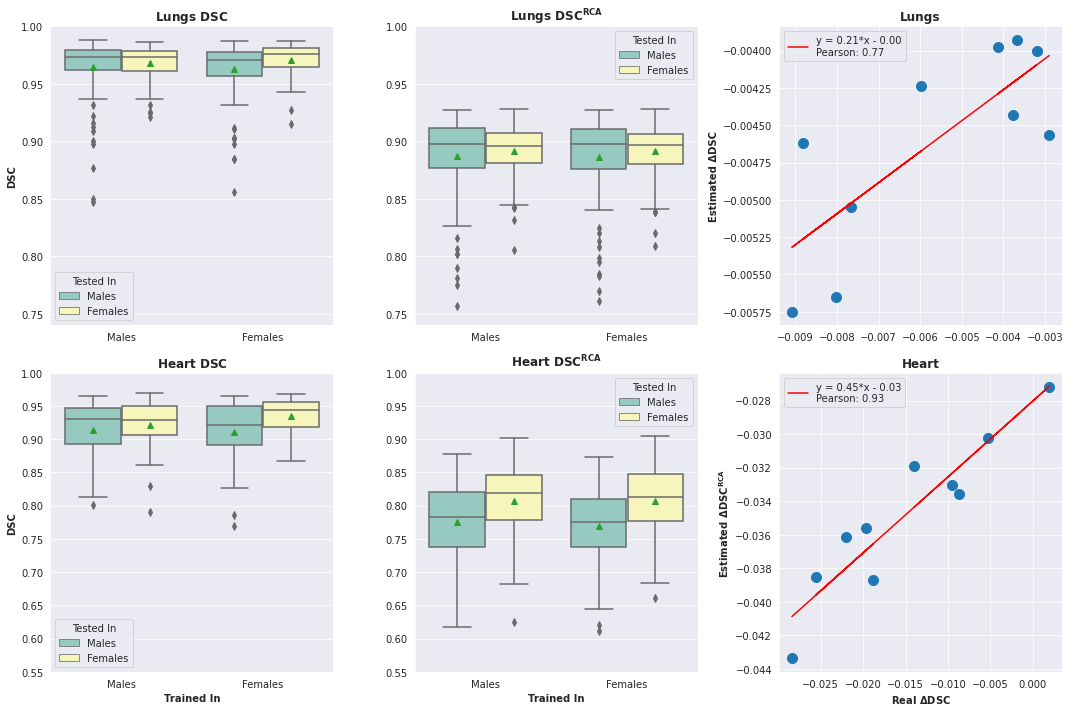

In [5]:
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import linregress, pearsonr

# Make titles bold

plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'

plt.figure(figsize = (15, 10))

plt.subplot(2, 3, 1)
sns.boxplot(x = "Trained In", y = "Dice Lungs", hue="Tested In", data = data_12, palette = "Set3", showmeans = True)
plt.title("Lungs $\mathregular{DSC}$")
plt.ylim([0.74, 1])
plt.xlabel("")
plt.ylabel("DSC")

plt.subplot(2, 3, 2)
sns.boxplot(x = "Trained In", y = "Dice Lungs", hue="Tested In", data = data_34, palette = "Set3", showmeans = True)
plt.title("Lungs $\mathregular{DSC^{RCA}}$")
plt.ylim([0.74, 1])
plt.xlabel("")
plt.ylabel("")

plt.subplot(2, 3, 4)
sns.boxplot(x = "Trained In", y = "Dice Heart", hue="Tested In", data = data_56, palette = "Set3", showmeans = True)
plt.title("Heart $\mathregular{DSC}$")
plt.ylim([0.55, 1])
plt.ylabel("DSC")

plt.subplot(2, 3, 5)
sns.boxplot(x = "Trained In", y = "Dice Heart", hue="Tested In", data = data_78, palette = "Set3", showmeans = True)
plt.title("Heart $\mathregular{DSC^{RCA}}$")
plt.ylim([0.55, 1])
plt.ylabel("")

plt.subplot(2,3,3)
plt.scatter(pairs_lungs[:, 0], pairs_lungs[:, 1], s = 100)
plt.xlabel("")
plt.ylabel('Estimated ΔDSC')
plt.title('Lungs')

# Perform linear regression
slope, intercept, r_value, _, _ = linregress(pairs_lungs[:, 0], pairs_lungs[:, 1])

# Calculate Pearson coefficient
pearson_coeff, _ = pearsonr(pairs_lungs[:, 0], pairs_lungs[:, 1])

# Plot the fitted line
x = pairs_lungs[:, 0]
y = slope * x + intercept
if intercept > 0:
    plt.plot(x, y, color='red', label=f'y = {slope:.2f}*x + {intercept:.2f}\nPearson: {pearson_coeff:.2f}')
else:
    plt.plot(x, y, color='red', label=f'y = {slope:.2f}*x - {abs(intercept):.2f}\nPearson: {pearson_coeff:.2f}')
    
plt.legend()

plt.subplot(2,3,6)
plt.scatter(pairs_heart[:, 0], pairs_heart[:, 1], s = 100)
plt.xlabel('Real $\mathregular{\Delta DSC}$')
plt.ylabel('Estimated $\mathregular{\Delta DSC^{RCA}}$')
plt.title('Heart')

# Perform linear regression
slope, intercept, r_value, _, _ = linregress(pairs_heart[:, 0], pairs_heart[:, 1])

# Calculate Pearson coefficient
pearson_coeff, _ = pearsonr(pairs_heart[:, 0], pairs_heart[:, 1])

# Plot the fitted line
x = pairs_heart[:, 0]
y = slope * x + intercept
if intercept > 0:
    plt.plot(x, y, color='red', label=f'y = {slope:.2f}*x + {intercept:.2f}\nPearson: {pearson_coeff:.2f}')
else:
    plt.plot(x, y, color='red', label=f'y = {slope:.2f}*x - {abs(intercept):.2f}\nPearson: {pearson_coeff:.2f}')


plt.legend()

plt.tight_layout()

plt.savefig('figure3.png', dpi = 300)